In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

flight_train_dataset = pd.read_excel('Data_Train.xlsx')
flight_test_dataset = pd.read_excel('Test_set.xlsx')

In [2]:
flight_train_dataset.head() #null/nan values exist

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
flight_train_dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
flight_train_dataset['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JDH → JAI → DEL → HYD       1
CCU → RPR → HYD → BLR             1
BOM → JLR → HYD                   1
BOM → BBI → HYD                   1
BOM → DED → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [5]:
#dropping the null/nan values.

flight_train_dataset.dropna(inplace=True)

In [6]:
# checking null/nan values now , looks good.

flight_train_dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
flight_train_dataset['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
29h 30m      1
19h 50m      1
33h 20m      1
30h 25m      1
13h 35m      1
Name: Duration, Length: 368, dtype: int64

## EDA and Feature engineering

In [8]:
#converting Date_of_Journey field to int values for model

flight_train_dataset['Day_of_Journey'] = pd.to_datetime(flight_train_dataset['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [9]:
flight_train_dataset['Month_of_Journey'] = pd.to_datetime(flight_train_dataset['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [10]:
flight_train_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
flight_train_dataset.drop(['Date_of_Journey'],axis=1,inplace=True) #dropping column

In [12]:
flight_train_dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
#similar thing for Dep_Time 

flight_train_dataset['Dep_Hour']=pd.to_datetime(flight_train_dataset['Dep_Time']).dt.hour
flight_train_dataset['Dep_Min']=pd.to_datetime(flight_train_dataset['Dep_Time']).dt.minute

#dropping Dep_Time

flight_train_dataset.drop(['Dep_Time'],axis=1,inplace=True) 

In [14]:
flight_train_dataset.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
#similar thing for Arrival time 

flight_train_dataset['Arrival_Hour']=pd.to_datetime(flight_train_dataset['Arrival_Time']).dt.hour
flight_train_dataset['Arrival_Min']=pd.to_datetime(flight_train_dataset['Arrival_Time']).dt.minute

#dropping Dep_Time

flight_train_dataset.drop(['Arrival_Time'],axis=1,inplace=True) 

In [16]:
flight_train_dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
x = list(flight_train_dataset['Duration'])
for i in range(len(x)):
    if len(x[i].split()) != 2:
        if 'h' not in x[i]:
            x[i] = "0h "  + x[i]
        elif 'm' not in x[i]:
            x[i] = x[i] + " 0m"
            
duration_hours = []
duration_mins = []

for i in range(len(x)):
    duration_hours.append(x[i].split(sep='h')[0])
    duration_mins.append(x[i].split(sep='m')[0].split()[-1])

In [18]:
flight_train_dataset['Duration_hours']=duration_hours
flight_train_dataset['Duration_mins']=duration_mins

In [19]:
flight_train_dataset.drop(['Duration'],axis=1, inplace=True)

In [20]:
flight_train_dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Categorical Data Handling

In [21]:
flight_train_dataset['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

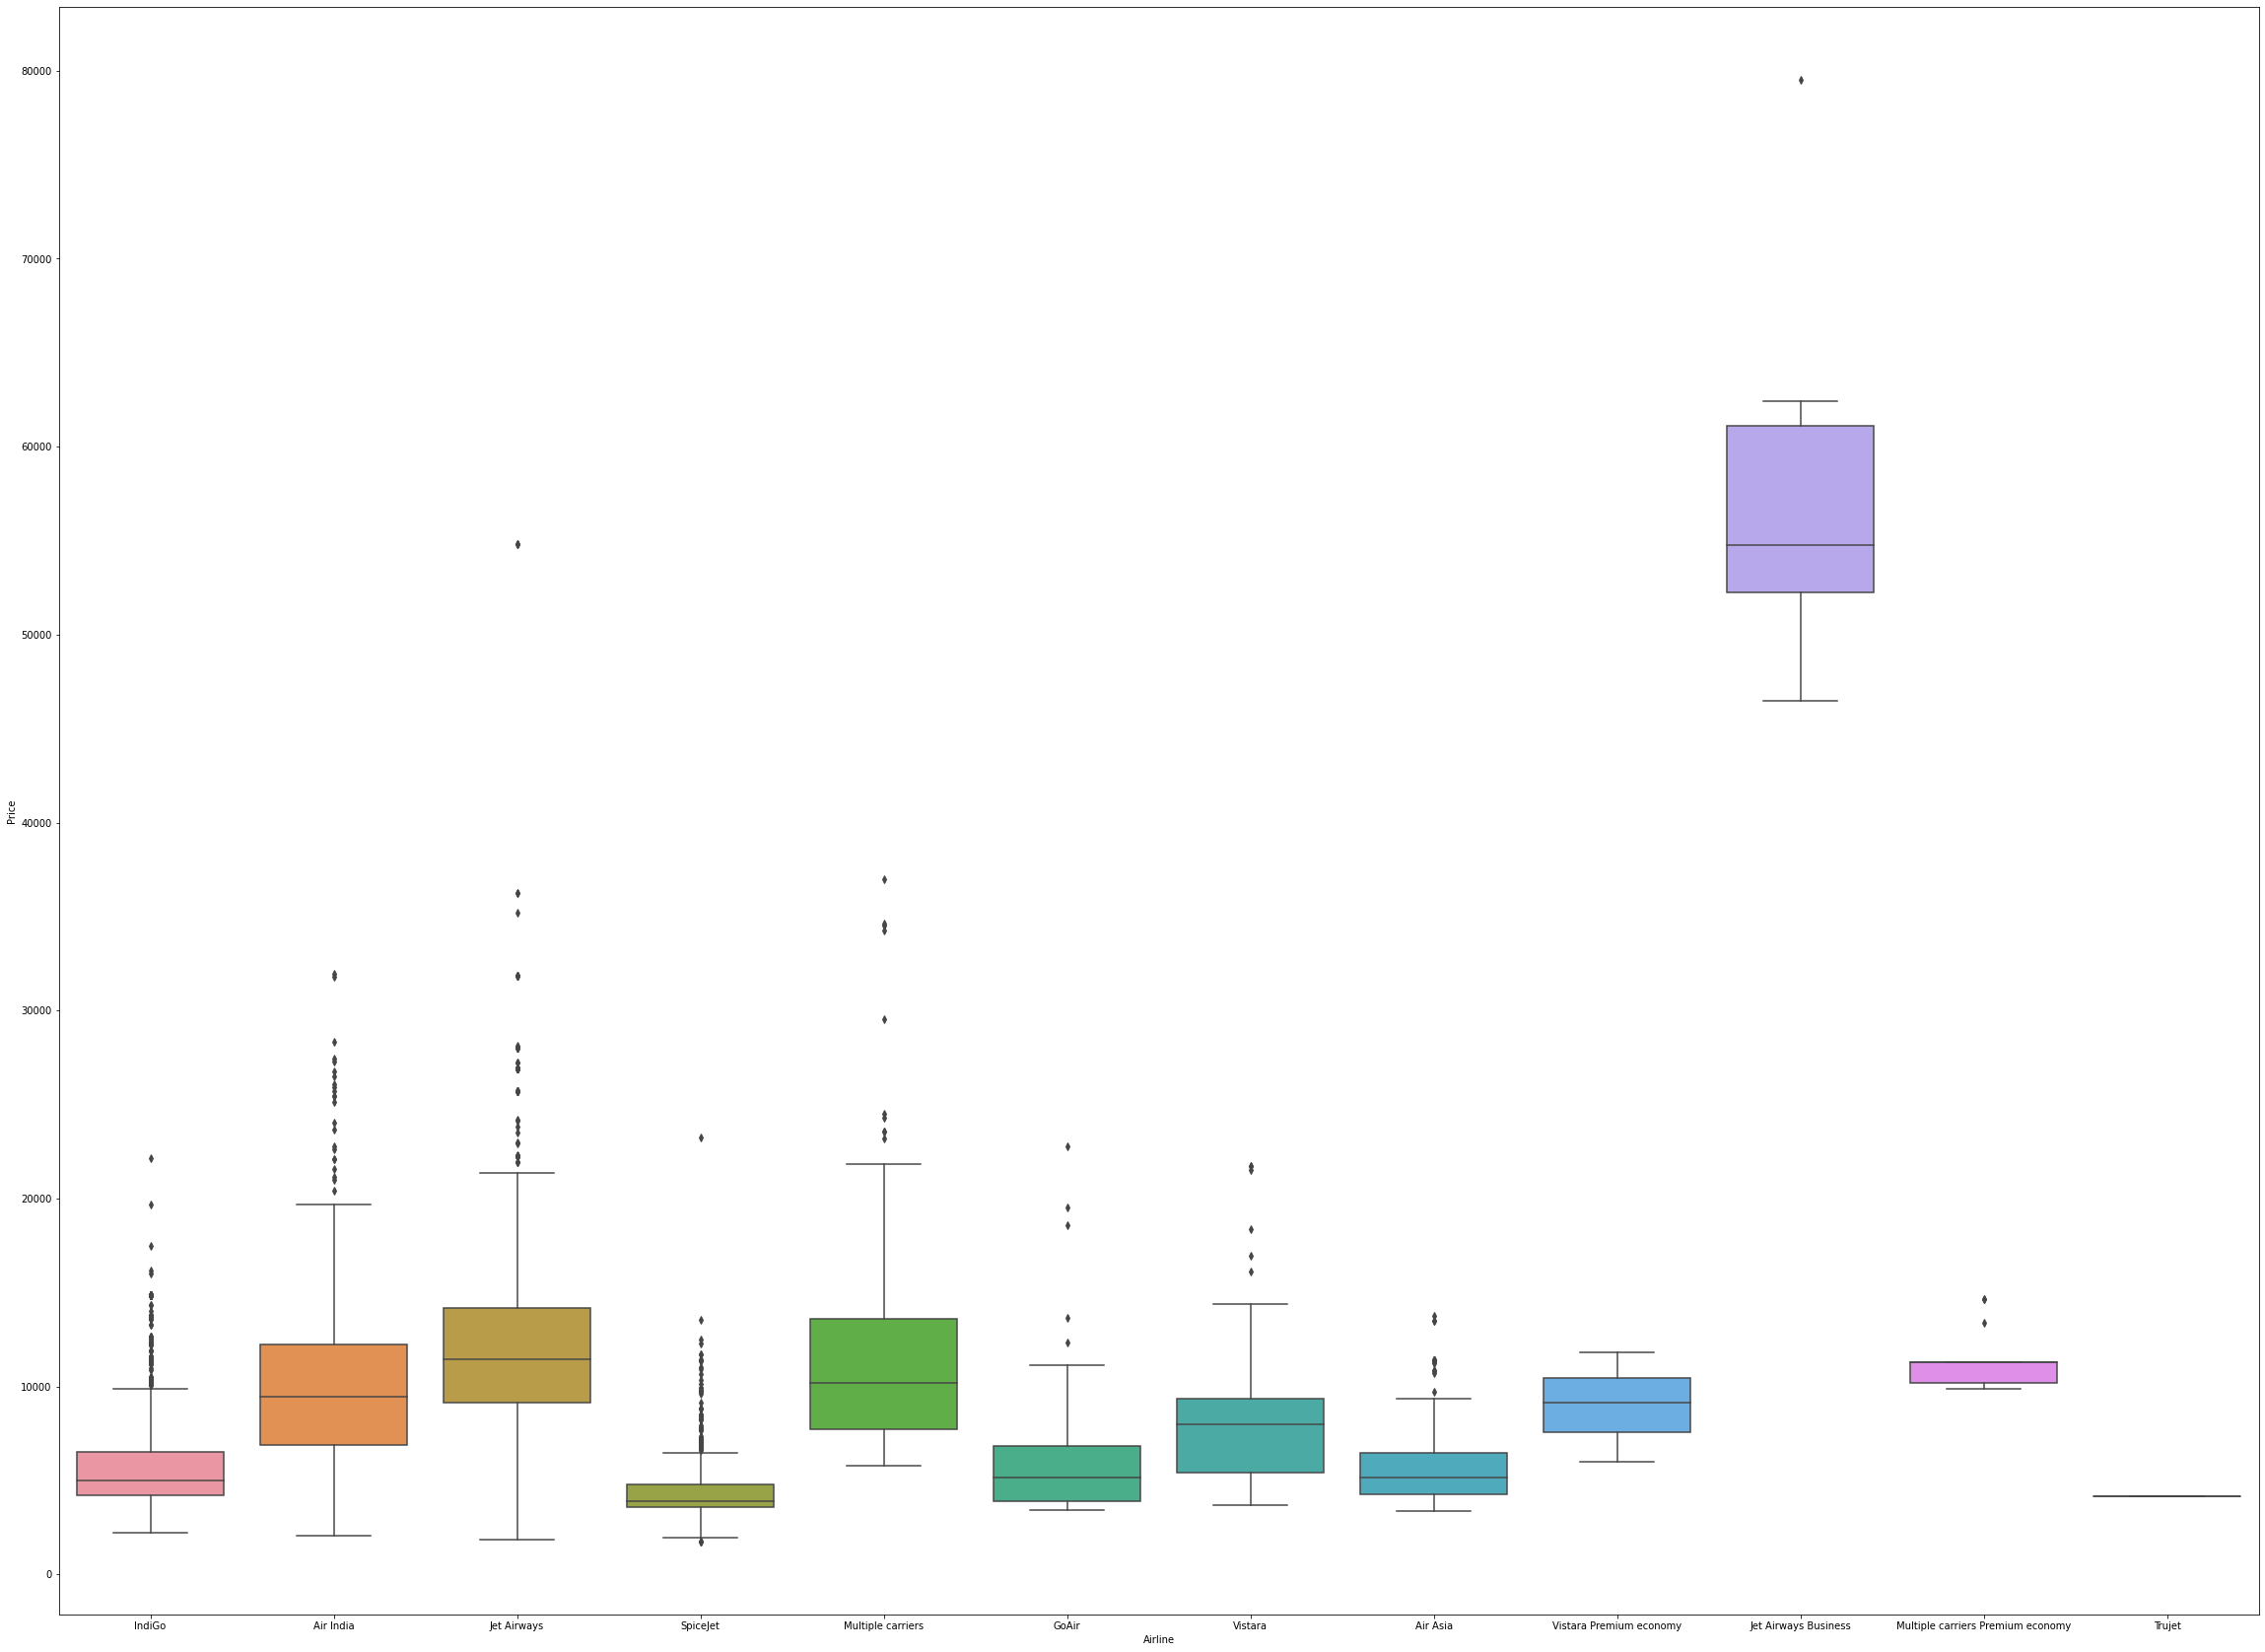

In [22]:
plt.figure(figsize=(40,30))
sns.boxplot(x='Airline', y = 'Price' , data = flight_train_dataset) #Price range of jat airways business class is much higher than other carriers


In [23]:
#OneHotEncoding on Airlines field. (As it is a nominal category)
Airline = flight_train_dataset[['Airline']]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
flight_train_dataset['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

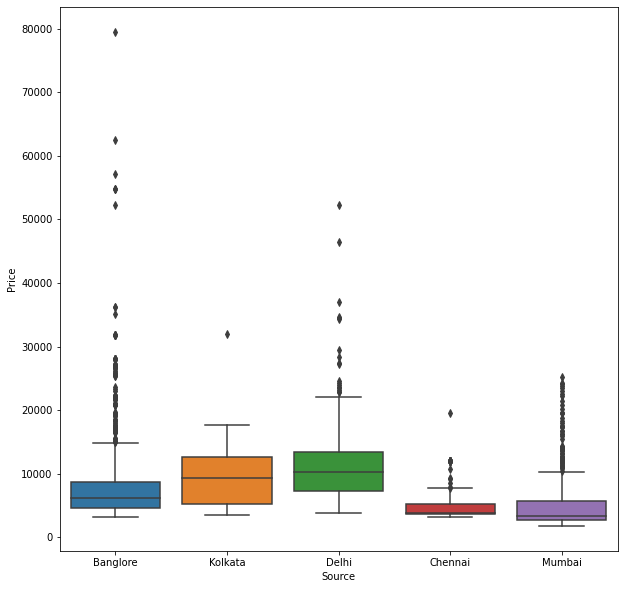

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Source', y = 'Price' , data = flight_train_dataset) #Price range of jat airways business class is much higher than other carriers


In [26]:
#OneHotEncoding on Source field. (As it is a nominal category)


Source = pd.get_dummies(flight_train_dataset[['Source']], drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
flight_train_dataset['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

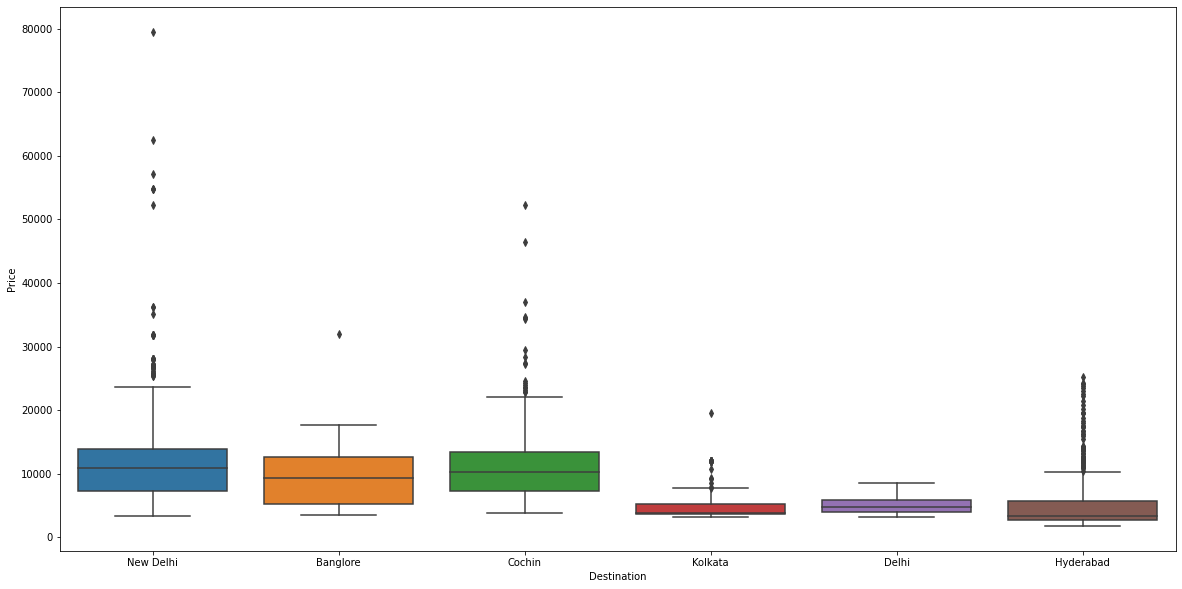

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Destination', y = 'Price' , data = flight_train_dataset) #Price range of jat airways business class is much higher than other carriers


In [29]:
#OneHotEncoding on Destination field. (As it is a nominal category)
flight_train_dataset.replace('New Delhi','Delhi',inplace=True)

Destination = pd.get_dummies(flight_train_dataset[['Destination']], drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [30]:
flight_train_dataset['Additional_Info'].value_counts() #78% of the values are no info and hence dropping this.
#also Route and Total stops are similar and hence dropping Route

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [31]:
flight_train_dataset.drop(['Route','Additional_Info'],axis=1, inplace=True)

In [32]:
flight_train_dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [33]:
flight_train_dataset['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

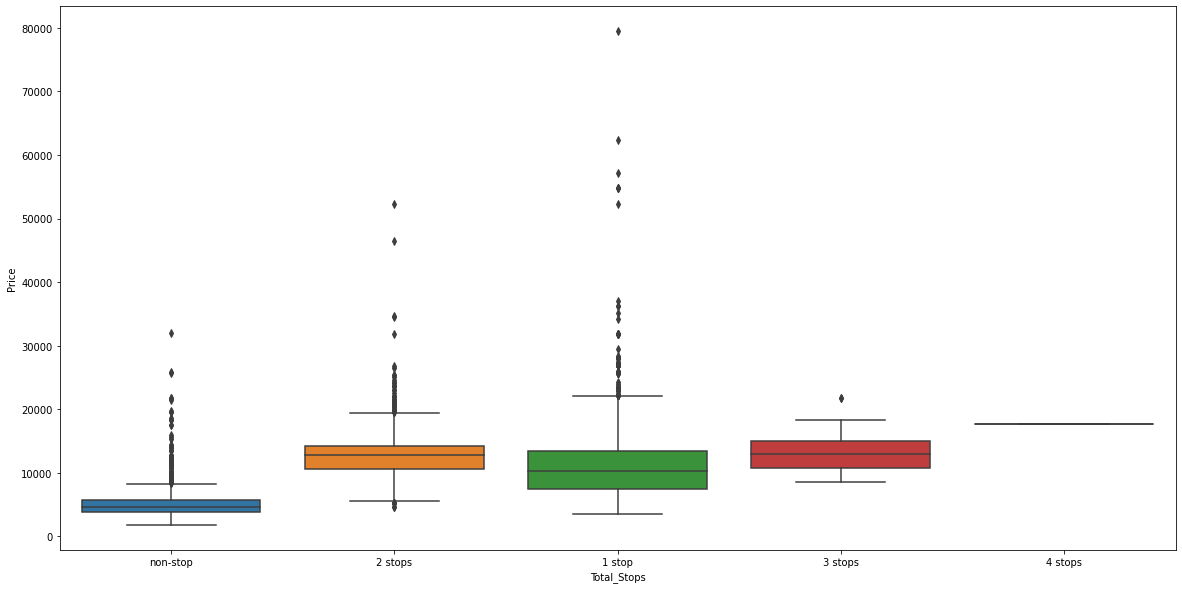

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Total_Stops', y = 'Price' , data = flight_train_dataset) #Price range of jat airways business class is much higher than other carriers


In [35]:
flight_train_dataset['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [36]:
flight_train_dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


In [37]:
#Concatinating all one encoded dataframes to flight_train_dataset dataframe

flight_train_dataset=pd.concat([flight_train_dataset,Airline,Source,Destination],axis=1)

In [38]:
flight_train_dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,1,0,0


In [39]:
flight_train_dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,1,0,0


In [40]:
flight_train_dataset.drop(['Source','Destination','Airline'], axis=1 , inplace=True)

In [41]:
flight_train_dataset.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


# Converting the test data set

In [42]:
flight_test_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
flight_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [44]:
#similar feature engineering to train data
flight_test_dataset['Day_of_Journey'] = pd.to_datetime(flight_test_dataset['Date_of_Journey'], format="%d/%m/%Y").dt.day
flight_test_dataset['Month_of_Journey'] = pd.to_datetime(flight_test_dataset['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [45]:
flight_test_dataset.drop(['Date_of_Journey'],axis=1,inplace=True)

In [46]:
#similar thing for Dep_Time 

flight_test_dataset['Dep_Hour']=pd.to_datetime(flight_test_dataset['Dep_Time']).dt.hour
flight_test_dataset['Dep_Min']=pd.to_datetime(flight_test_dataset['Dep_Time']).dt.minute

#dropping Dep_Time

flight_test_dataset.drop(['Dep_Time'],axis=1,inplace=True) 

In [47]:
#similar thing for Arrival time 

flight_test_dataset['Arrival_Hour']=pd.to_datetime(flight_test_dataset['Arrival_Time']).dt.hour
flight_test_dataset['Arrival_Min']=pd.to_datetime(flight_test_dataset['Arrival_Time']).dt.minute

#dropping Dep_Time

flight_test_dataset.drop(['Arrival_Time'],axis=1,inplace=True) 

In [48]:
y = list(flight_test_dataset['Duration'])
for i in range(len(y)):
    if len(y[i].split()) != 2:
        if 'h' not in y[i]:
            y[i] = "0h "  + y[i]
        elif 'm' not in y[i]:
            y[i] = y[i] + " 0m"
            
duration_hours = []
duration_mins = []

for i in range(len(y)):
    duration_hours.append(y[i].split(sep='h')[0])
    duration_mins.append(y[i].split(sep='m')[0].split()[-1])

In [49]:
flight_test_dataset['Duration_hours']=duration_hours
flight_test_dataset['Duration_mins']=duration_mins

In [50]:
flight_test_dataset.drop(['Duration'],axis=1, inplace=True)

In [51]:
#OneHotEncoding on Airlines field. (As it is a nominal category)

Airline = pd.get_dummies(flight_test_dataset[['Airline']], drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [52]:
#OneHotEncoding on Source field. (As it is a nominal category)

Source = pd.get_dummies(flight_test_dataset[['Source']], drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [53]:
#OneHotEncoding on Destination field. (As it is a nominal category)

Destination = pd.get_dummies(flight_test_dataset[['Destination']], drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [54]:
flight_test_dataset.drop(['Route','Additional_Info'],axis=1, inplace=True)

In [55]:
flight_test_dataset['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [56]:
#Concatinating all one encoded dataframes to flight_train_dataset dataframe

flight_test_dataset=pd.concat([flight_test_dataset,Airline,Source,Destination],axis=1)

In [57]:
flight_test_dataset.drop(['Airline'], axis=1, inplace=True)

In [58]:
flight_test_dataset.drop(['Source','Destination'],axis=1, inplace=True)

In [59]:
flight_test_dataset.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection 

In [60]:
flight_train_dataset.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [61]:
X = flight_train_dataset.loc[:,['Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata']]

In [62]:
y = flight_train_dataset.iloc[:,1]

In [63]:
#important features using extraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

Extra_Trees_Regressor = ExtraTreesRegressor()
Extra_Trees_Regressor.fit(X,y)

ExtraTreesRegressor()

In [64]:
print(Extra_Trees_Regressor.feature_importances_)

[2.11646093e-01 1.43195580e-01 5.81364307e-02 2.38107287e-02
 2.14753460e-02 2.73737171e-02 1.94853378e-02 1.60360969e-01
 1.83591018e-02 8.28275088e-03 1.94805935e-03 1.70216326e-02
 1.32856506e-01 6.74101548e-02 2.02145180e-02 7.87226257e-04
 5.44057677e-03 9.26668555e-05 4.27536196e-03 5.93739320e-05
 6.65416757e-04 1.07522100e-02 4.92511741e-03 8.15842925e-03
 4.81977299e-03 1.85127005e-02 9.19163084e-03 7.42591360e-04]


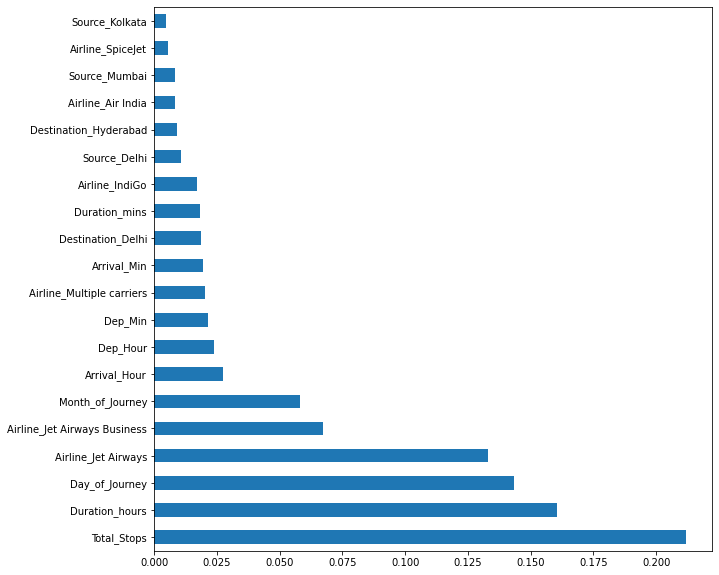

In [65]:
plt.figure(figsize=(10,10))
features_importances = pd.Series(Extra_Trees_Regressor.feature_importances_,index = X.columns)
features_importances.nlargest(20).plot(kind='barh')
plt.show()

# Creating MODEL for prediction

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
#Using a random forest regressor

from sklearn.ensemble import RandomForestRegressor

Model = RandomForestRegressor()
Model.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
y_pred = Model.predict(X_test)

In [69]:
Model.score(X_train,y_train)

0.9539247988318948

In [70]:
Model.score(X_test,y_test)

0.791407496222323

C:\Users\hdeok\anaconda3\envs\flightpricepred\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


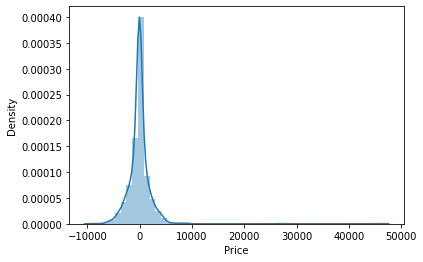

In [71]:
sns.distplot(y_test-y_pred)
plt.show()

In [72]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1188.2603069034121
MSE: 4497683.3152522035
RMSE: 2120.77422543094


In [73]:
from sklearn.model_selection import RandomizedSearchCV

#The number of trees in the forest.
n_estimators = [int(i) for i in np.linspace(start=100 , stop=1200 , num=12)]
#The maximum depth of the tree.
max_depth= [int(i) for i in np.linspace(start=5 , stop=30 , num=6)]
#The minimum number of samples required to split an internal node
min_samples_split = [5, 10 , 15 , 20 , 50 , 100]
#The number of features to consider when looking for the best split
max_features = ["auto", "sqrt"]
#The minimum number of samples required to be at a leaf node.
min_samples_leaf =[2, 5, 10, 20]

In [74]:
random_grid = {'n_estimators':n_estimators,
              'max_depth':max_depth,
               'min_samples_split':min_samples_split,
              'max_features':max_features,
              'min_samples_leaf':min_samples_leaf}

In [75]:
final_model = RandomizedSearchCV(estimator=Model,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10, cv=5,verbose=2,random_state=42,n_jobs=1)

In [76]:
final_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=  23.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=  13.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=  13.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=  12.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=  10.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=900; total time=  20.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=900; total time=  25.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estim

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 20],
                                        'min_samples_split': [5, 10, 15, 20, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
final_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [78]:
y_pred = final_model.predict(X_test)

C:\Users\hdeok\anaconda3\envs\flightpricepred\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


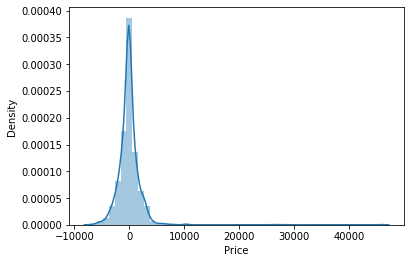

In [79]:
sns.distplot(y_test-y_pred)
plt.show()

In [80]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1158.590225761063
MSE: 4035845.5729978727
RMSE: 2008.9414060638685


# Save model for reusability

In [85]:
import pickle
#open a file and save the model

file = open('flight_rf_rscv.pkl','wb')

# dump info to the file
pickle.dump(final_model,file)

In [86]:
model_test = open('flight_rf_rscv.pkl', 'rb')
rand_forest = pickle.load(model_test)

In [87]:
prediction = rand_forest.predict(X_test)

In [88]:
metrics.r2_score(y_test,prediction)

0.8128264989051426